<a href="https://colab.research.google.com/github/Kathan-Vakharia/SimpleLinearRegression-TSF/blob/main/1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression


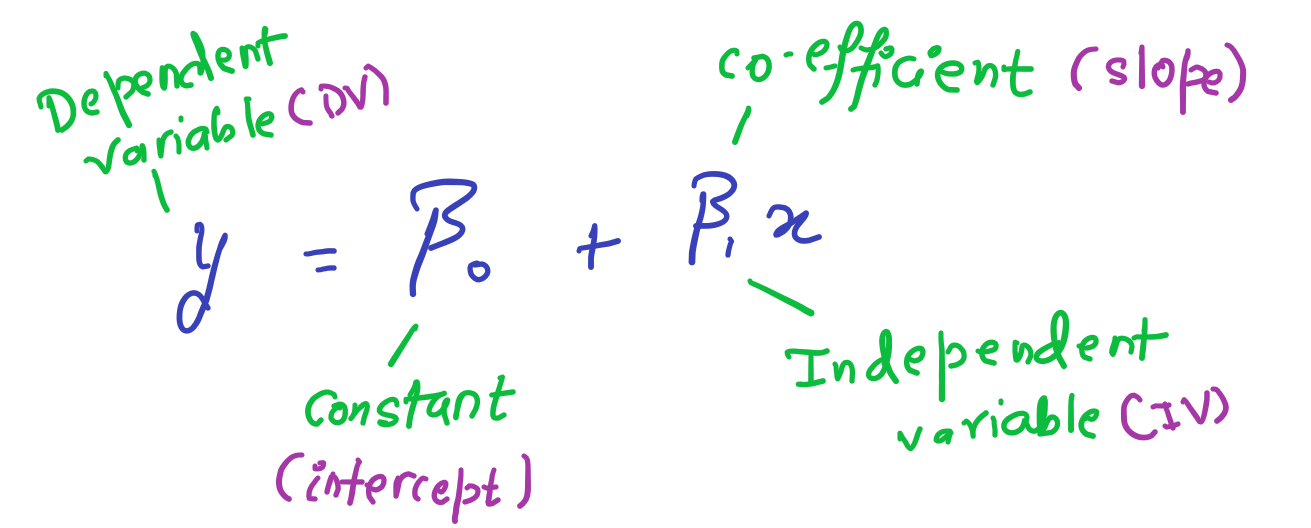

# Importing the Libraries

In [44]:
import numpy as np #numerical computing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import pandas as pd #data analysis

## Data Dictionary

- `Hours` - Number of study hours
- `Scores` - score received by student in percentage

# Importing the Dataset

In [45]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(url)

# Exploring the dataset

In [46]:
# display first 10 rows
dataset.head(n=10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [47]:
#find dimensions
dataset.shape

(25, 2)

In [48]:
#colum info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [49]:
#summary stats
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- We have two numerical columns namely `Hours` and `Scores` in our dataset.

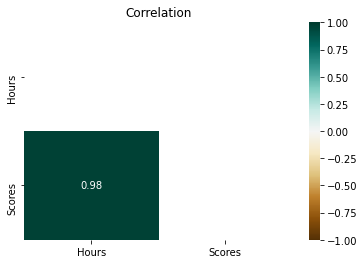

In [50]:
#checking correlation
corr = dataset.corr()
mask  = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(dataset.corr(),vmax=1, vmin=-1 ,
            annot=True,mask=mask, cmap="BrBG")
plt.title("Correlation")
plt.show()

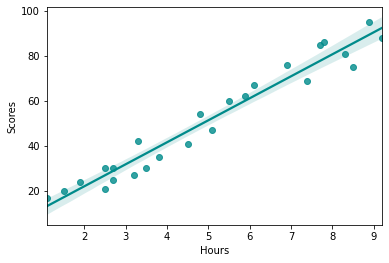

In [51]:
#visualizing corelation
sns.regplot(data = dataset, x="Hours", y="Scores",
            color="darkcyan")
plt.show()

# Extracting Input and Output variables

In [52]:
X = dataset[["Hours"]].to_numpy()#IV
y = dataset["Scores"].to_numpy()#DV

# Training the model

## Why not splitting of Dataset?

The dataset has only **25** entries. The model will not be trained well if I split the dataset. Although I'll perform **K-fold Cross Validation** in the end to settle the debate.

In [53]:
from sklearn.linear_model import LinearRegression
#instantiation of model
regressor = LinearRegression()
#fit the model
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Making Prediction

In [54]:
hours = [[9.25]]
print(f"The student studying for {hours[0][0]}"
      f" hours will get {regressor.predict(hours)[0]: 0.3f} % ")

The student studying for 9.25 hours will get  92.910 % 


# Coefficient and Constant Values

In [55]:
slope = regressor.coef_
intercept = regressor.intercept_
print("The linear regression model is, ")
print(f"Score = {slope[0]:0.3f} * Hours + {intercept:0.3f}")

The linear regression model is, 
Score = 9.776 * Hours + 2.484


# Visualizing the model

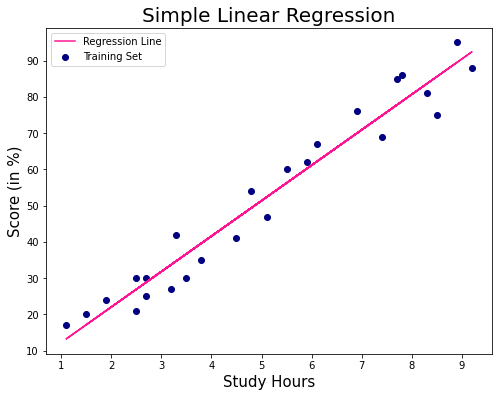

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="navy",
            label="Training Set")
plt.plot(X, regressor.predict(X),color="deeppink",
         label="Regression Line")
plt.title("Simple Linear Regression", size=20)
plt.xlabel("Study Hours", size=15)
plt.ylabel("Score (in %)", size=15)
plt.legend()
plt.show()

# K-fold cross validation

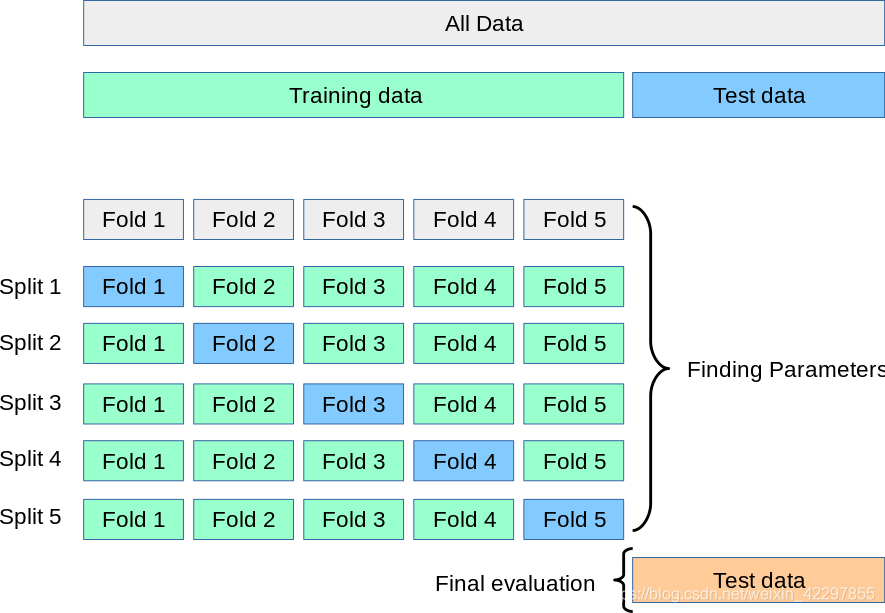

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, 
                         cv=4, #no of folds
                         scoring="r2" #metric used
                         )
print("Average Score: {:0.3f}%".format(np.mean(scores)*100))
print("Standard Deviation: {:0.3f}%".format(np.std(scores)*100))

Average Score: 92.779%
Standard Deviation: 2.246%


# Conclusion
- Our model's average $R^{2}$ value is $92.779 \% $ which implies, it is able to explain  more than $90\%$ of variation in our dependent variable `Scores` on an average.